In [1]:
# Faltó el ajuste más generalizada
#4.4
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [11]:
# leemos los datos
data = pd.read_csv('fit_curve.csv') 
x, y = data['x'], data['y']

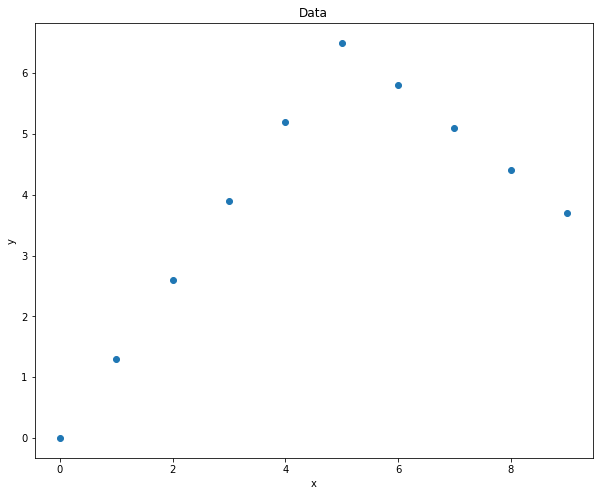

In [12]:
plt.figure(figsize=(10, 8))
plt.title('Data')
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Identificamos en la distribución de los puntos un comportamiento lineal en 2 regiones: la primera en (0, 5) y la segunda en (5, 9). Realizamos 2 ajustes lineales por separado para cada región:

In [28]:
def f_lineal(x, a, b):
    return a*x + b

# ajuste en la primera región
popt, pcov = curve_fit(f_lineal, x[0:6], y[0:6])

# ajuste en la segunda región 
popt1, pcov1 = curve_fit(f_lineal, x[5:], y[5:])


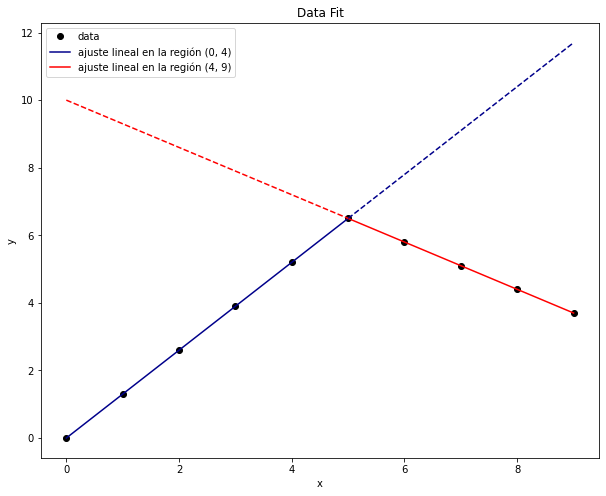

In [33]:
# graficamos
plt.figure(figsize=(10, 8))
plt.title('Data Fit')
plt.plot(x, y, 'ko', label = 'data')
plt.plot(x[0:6], f_lineal(x[0:6], *popt), label  = 'ajuste lineal en la región (0, 4)', color =  'darkblue')
plt.plot(x[5:], f_lineal(x[5:], *popt1), label  = 'ajuste lineal en la región (4, 9)', color =  'red')
plt.plot(x[5:], f_lineal(x[5:], *popt), linestyle = 'dashed', color =  'darkblue')
plt.plot(x[0:6], f_lineal(x[0:6], *popt1), linestyle = 'dashed', color =  'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Los párametros de ajuste están dados por popt y el error estimado se obtiene de la matriz de covarianza pcov, calculando la raíz cuadrada de la diagonal. 

In [49]:
# primera región
perr = np.sqrt(np.diag(pcov))
print('los parametros de ajuste son a = {} y b = {}'.format(np.round(popt[0], 4), np.round(popt[1], 3)))
print('el error asociado a los parametros es: {}  para a y {} para b'.format(perr[0], perr[1]))

los parametros de ajuste son a = 1.3 y b = -0.0
el error asociado a los parametros es: 2.3360662326651587e-13  para a y 8.965732120924e-17 para b


In [50]:
# segunda región
perr1 = np.sqrt(np.diag(pcov1))
print('los parametros de ajuste son a = {} y b = {}'.format(np.round(popt1[0], 4), np.round(popt1[1], 3)))
print('el error asociado a los parametros es: {}  para a y {} para b'.format(perr1[0], perr1[1]))

los parametros de ajuste son a = -0.7 y b = 10.0
el error asociado a los parametros es: 3.2431690094691543e-16  para a y 2.3160859478722923e-15 para b


Considerar la siguiente función de ajuste:

def gauss (x , norm , mean , sigma ) :

return $norm ∗ np . exp(−(x−mean)∗∗2/(2∗ sigma ∗∗2)) $

In [78]:
def gauss(x, norm, mean, sigma):
    return  norm * np.exp(-(x - mean)**2 / (2*sigma**2))

def chi2(popt):
    return np.sum(np.square(y - gauss(x, *popt)))

In [79]:
popt2, pcov2 = curve_fit(gauss, x, y)

In [80]:
chi2(popt2)

1.5817602776878317

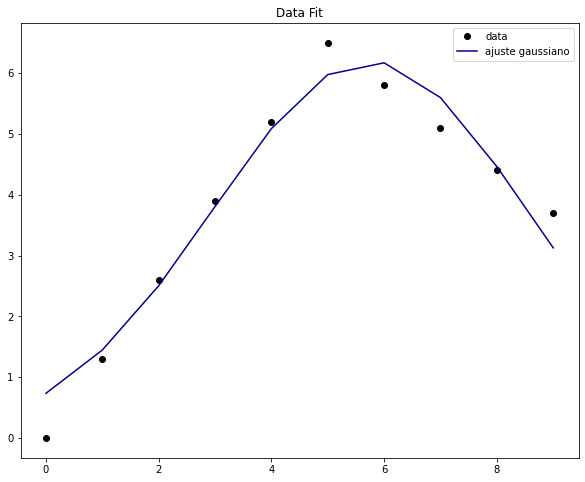

In [81]:
# graficamos
plt.figure(figsize=(10, 8))
plt.title('Data Fit')
plt.plot(x, y, 'ko', label = 'data')
plt.plot(x, gauss(x, *popt2), label  = 'ajuste gaussiano', color =  'darkblue')
plt.legend()
plt.show()